In [1]:
import numpy as np

In [2]:
pip install CPLEX

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement CPLEX (from versions: )
No matching distribution found for CPLEX


In [3]:
pip install docplex

Note: you may need to restart the kernel to use updated packages.


In [4]:
#rnd = np.random
#rnd.seed(0)

In [5]:
n= 21
Q= 3000
N= [i for i in range(1,n+1)]
V=[0] + N
#q={i:rnd.randint(1,10) for i in N}

In [6]:
loc_x = [7.5, 0, 0.9, 6.25, 7.85, 10, 13.55, 15.25, 14.35, 15.25, 15.75, 15.75, 11.75, 12.3, 8.75, 7.9, 8.35, 5.65, 4.85, 0.5, 0.5, 0]
loc_y = [4.7, 9.7, 10, 7.8, 8.9, 11.4, 11, 9, 8.4, 7.6, 3.7, 1.7, 0.55, 4.9, 6.95, 3.7, 1.65, 3.4, 0, 0.9, 4.5, 6.7]

In [7]:
q = {1: 1400,
 2: 800,
 3: 100,
 4: 400,
 5: 1100,
 6: 700,
 7: 2100,
 8: 800,
 9: 500,
 10: 900,
 11: 900,
 12: 1800,
 13: 1300,
 14: 600,
 15: 300,
 16: 100,
 17: 2100,
 18: 700,
 19: 2500,
 20: 1300,
 21: 1200}

In [8]:
import matplotlib.pyplot as plt

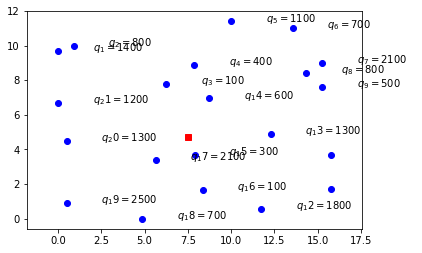

In [9]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2,loc_y[i]))
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');

In [10]:
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}

In [11]:
from docplex.mp.model import Model

In [12]:
mdl = Model('CVRP')

In [13]:
x = mdl.binary_var_dict(A,name='x')
u = mdl.continuous_var_dict(N,ub=Q,name='u')

In [14]:
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)
mdl.add_constraints(u[i]>=q[i] for i in N)
solution = mdl.solve(log_output=True)

TypeError: object of type 'generator' has no len()

In [ ]:
print(solution)

In [ ]:
active_arcs = [a for a in A if x[a].solution_value>0.9]

In [ ]:
active_arcs

In [ ]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2,loc_y[i]))
for i,j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],c='g', alpha=0.3)
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');